This notebook will walk you through the important tables in ephys and histology schemas and introduce some useful queries

In [1]:
# import datajoint and modules from ibl_pipeline
import datajoint as dj
from ibl_pipeline import reference, subject, acquisition, behavior, ephys, histology
from ibl_pipeline.analyses import behavior as behavior_analyses
import numpy as np

Connecting dbadmin@datajoint-rds.cyuksi65nrdq.us-east-1.rds.amazonaws.com:3306
Connected to https://alyx.internationalbrainlab.org as vathes
Connected to https://alyx.internationalbrainlab.org as vathes
Connected to https://alyx.internationalbrainlab.org as vathes
Connected to https://alyx.internationalbrainlab.org as vathes
Downloading: /src/IBL-pipeline/data/FlatIron/histology/ATLAS/Needles/Allen/average_template_25.nrrd Bytes: 32998960
Downloading: /src/IBL-pipeline/data/FlatIron/histology/ATLAS/Needles/Allen/annotation_25.nrrd Bytes: 40353630% 


2021-05-21 18:45:27.13 INFO     [atlas.py:751] computing brain atlas annotations lookup table
2021-05-21 18:45:41.498 INFO     [atlas.py:760] saving /src/IBL-pipeline/data/FlatIron/histology/ATLAS/Needles/Allen/annotation_25_lut_v01.npz ...


Connected to https://alyx.internationalbrainlab.org as vathes


# Ephys tables

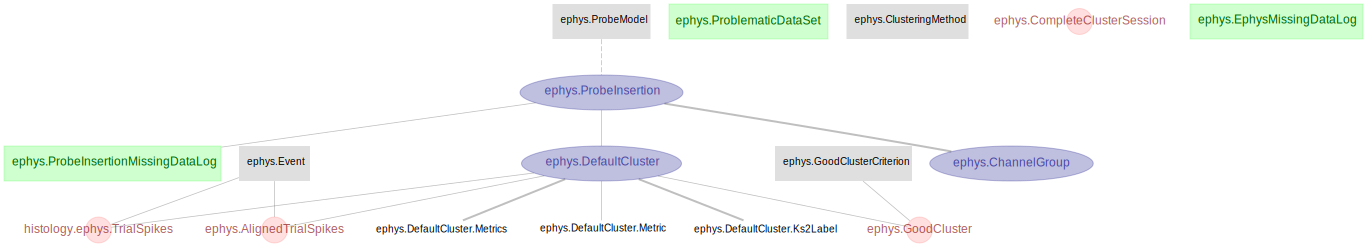

In [2]:
dj.Diagram(ephys)

In the diagram, tables not represented as a class are the ones that were the leftovers during development. We will clean these tables up once in a while and you can ignore them for the moment.

Here is a list of important tables:
    
>* ProbeModel: model of a probe, ingested from the alyx table experiments.probemodel  
>* ProbeInsertion: ingested from the alyx table experiments.probeinsertion  
>* ChannelGroup: raw index and local coordinates of each channel group
>* DefaultCluster: Cluster properties achieved from the default clustering method.
>* DefaultCluster.Metrics: metrics exported from the spike sorting softwares.
>* DefaultCluster.Metric: same contents as Metrics, each metric is a separate entry (metric_name, metric_value), to support filtering on each of the metrics.  
>* DefaultCluster.Ks2Label: label given by kilosort2, ‘good’ or ‘mua’
>* GoodClusterCriterion: Criterion to identify whether a cluster is good.
>* GoodCluster: whether a cluster is good based on the criterion defined in GoodClusterCriterion
>* Event: Different behavioral events, including 'go cue', 'stim on', 'response', 'feedback', and 'movement'
>* AlignedTrialSpikes: spike times of each trial aligned to different events


Detailed table definitions could be easily checked with the method `describe()`, for example

In [3]:
ephys.DefaultCluster.describe();

# Cluster properties achieved from the default clustering method, ingested from alf files clusters.*
-> ephys.ProbeInsertion
cluster_id           : int                          
---
cluster_uuid         : uuid                         # uuid of this cluster
cluster_channel      : int                          # which channel this cluster is from
cluster_amp=null     : float                        # Mean amplitude of each cluster (µV)
cluster_waveforms=null : blob@ephys                   # Waveform from spike sorting templates (stored as a sparse array, only for a subset of channels closest to the peak channel)
cluster_waveforms_channels=null : blob@ephys                   # Index of channels that are stored for each cluster waveform. Sorted by increasing distance from the maximum amplitude channel.
cluster_depth=null   : float                        # Depth of mean cluster waveform on probe (µm). 0 means deepest site, positive means above this.
cluster_peak_to_trough=null : blob@ephys   

`blob@ephys` refers to a blob field in external storage, but as a user, you will feel that the field is similar as an internal blob field. 

Preview the contents of the table:

In [4]:
ephys.DefaultCluster()

subject_uuid,session_start_time start time,"probe_idx probe insertion number (0 corresponds to probe00, 1 corresponds to probe01)",cluster_id,cluster_uuid uuid of this cluster,cluster_channel which channel this cluster is from,cluster_amp Mean amplitude of each cluster (µV),"cluster_waveforms Waveform from spike sorting templates (stored as a sparse array, only for a subset of channels closest to the peak channel)",cluster_waveforms_channels Index of channels that are stored for each cluster waveform. Sorted by increasing distance from the maximum amplitude channel.,"cluster_depth Depth of mean cluster waveform on probe (µm). 0 means deepest site, positive means above this.",cluster_peak_to_trough trough to peak time (ms),cluster_spikes_times spike times of a particular cluster (seconds),"cluster_spikes_depths Depth along probe of each spike (µm; computed from waveform center of mass). 0 means deepest site, positive means above this",cluster_spikes_amps Amplitude of each spike (µV),cluster_spikes_templates Template ID of each spike (i.e. output of automatic spike sorting prior to manual curation),"cluster_spikes_samples Time of spikes, measured in units of samples in their own electrophysiology binary file.",cluster_ts
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,ddb47590-0da6-4353-bc7d-f7a53dba1db2,0,3.36357e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:28
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,1,e98101fe-734e-4b3c-b59d-450b499daf34,1,6.44137e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:29
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,2,08ea9c50-55aa-4c59-b247-804d1a8fba7f,1,3.07483e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:30
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,3,afd732e5-4fdf-472f-8726-dbae81a9f714,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:31
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,4,330cfd8f-0235-47d5-93c8-60fb0415c5ed,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:31
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,5,ec2fbf5c-0279-4979-adf6-8bcc62c21c1c,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:31
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,6,059018c4-a8bb-4f2b-8c5c-18ee10c6d22b,1,3.47621e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:32
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,7,d9baacaf-42ff-4bd1-a649-1ab65e1c03d1,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:32
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,8,3e129f19-25f5-4fc5-bb3e-46d73ad55023,1,2.73429e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:32
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,9,25cdeea3-3419-4791-9d0c-814ce30fcc94,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:33


# Histology tables

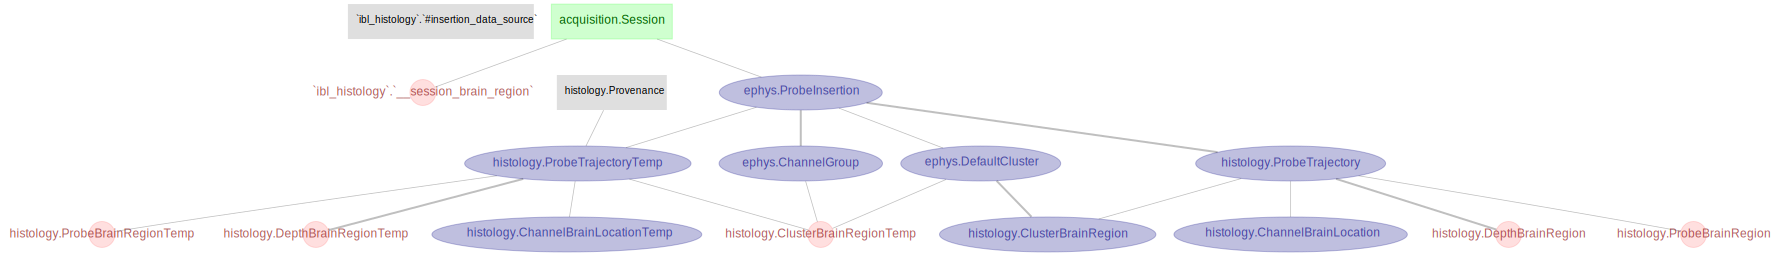

In [5]:
dj.Diagram(histology) + ephys.DefaultCluster + ephys.ProbeInsertion + acquisition.Session

Here is a list of important histology tables:

>* ProbeTrajectory: the final probe trajectory with multiple users' approval, ingested from FlatIron data.
>* ChannelBrainLocation: the final brain location assignment of each channel, ingested from FlatIron data.
>* ClusterBrainRegion: the final brain region assignment of each cluster, based on ChannelBrainLocation data on Flatiron


Before the final trajectory is resolved, intermediate histological results are saved in the following tables:

>* Provenance: method to estimate the probe trajectory, including Ephys aligned histology track, Histology track, Micro-manipulator, and Planned  
>* ProbeTrajectoryTemp: probe trajectory estimated with each method, ingested from Alyx table experiments.probetrajectory  
>* ChannelBrainLocationTemp: brain coordinates and region assignment of each channel, ingested from Alyx table experiments.channel  
>* ClusterBrainRegionTemp: Brain region assignment to each cluster  
>* ProbeBrainRegionTemp: Brain regions assignment to each probe, including the regions of finest granularity and their upper-level areas.  
>* DepthBrainRegionTemp: For each ProbeTrajectoryTemp, assign depth boundaries relative to the probe tip to each brain region covered by the trajectory

# Useful queries

## Select clusters from a particular session

In [6]:
# which sessions have cluster data?
acquisition.Session & ephys.DefaultCluster

subject_uuid,session_start_time start time,session_uuid,session_number number,session_end_time end time,session_lab name of lab,session_location name of the location,task_protocol,session_type type,session_narrative,session_ts
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,f354dc45-caef-4e3e-bd42-2c19a5425114,1,None,cortexlab,_iblrig_carandinilab_ephys_0,_iblrig_tasks_ephysChoiceWorld5.3.0,Experiment,None,2019-10-09 05:01:52
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-26 11:10:14,17231390-9b95-4ec6-806d-b3aae8af76ac,1,None,cortexlab,_iblrig_carandinilab_ephys_0,_iblrig_tasks_ephysChoiceWorld5.3.0,Experiment,None,2019-10-09 05:01:49
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-27 17:07:03,1d364d2b-e02b-4b5d-869c-11c1a0c8cafc,1,None,cortexlab,_iblrig_carandinilab_ephys_0,_iblrig_tasks_ephysChoiceWorld5.3.0,Experiment,None,2019-10-09 05:01:49
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-29 14:33:38,40e2f1bd-6910-4635-b9a7-1e76771a422e,1,None,cortexlab,_iblrig_carandinilab_ephys_0,_iblrig_tasks_ephysChoiceWorld5.3.0,Experiment,None,2019-10-09 05:01:49
0812d02d-d62b-416d-8b66-7956db34ee32,2020-07-23 18:59:30,65f5c9b4-4440-48b9-b914-c593a5184a18,1,2020-07-23 19:51:59,wittenlab,_iblrig_wittenlab_ephys_0,_iblrig_tasks_ephysChoiceWorld6.4.0,Experiment,None,2020-07-25 05:55:50
082fa374-a10c-4c47-9c50-1c23e7490e30,2020-07-29 17:28:21,41872d7f-75cb-4445-bb1a-132b354c44f0,1,2020-07-29 18:24:03,mrsicflogellab,_iblrig_mrsicflogel_ephys_0,_iblrig_tasks_ephysChoiceWorld6.4.1,Experiment,None,2020-07-30 06:04:28
082fa374-a10c-4c47-9c50-1c23e7490e30,2020-07-30 17:47:20,4d8c7767-981c-4347-8e5e-5d5fffe38534,1,2020-07-30 18:53:19,mrsicflogellab,_iblrig_mrsicflogel_ephys_0,_iblrig_tasks_ephysChoiceWorld6.4.1,Experiment,None,2020-07-31 06:03:28
082fa374-a10c-4c47-9c50-1c23e7490e30,2020-07-31 15:03:32,1e45d992-c356-40e1-9be1-a506d944896f,1,2020-07-31 16:22:43,mrsicflogellab,_iblrig_mrsicflogel_ephys_0,_iblrig_tasks_ephysChoiceWorld6.4.1,Experiment,None,2020-08-01 05:58:48
082fa374-a10c-4c47-9c50-1c23e7490e30,2020-08-01 15:51:24,03063955-2523-47bd-ae57-f7489dd40f15,1,2020-08-01 17:09:05,mrsicflogellab,_iblrig_mrsicflogel_ephys_0,_iblrig_tasks_ephysChoiceWorld6.4.1,Experiment,None,2020-08-02 05:53:53
088b6898-0a86-435e-b91f-eab829a846f6,2019-11-21 17:11:10,68baa22a-232f-4b8f-b491-018c6375bab2,1,2019-11-21 18:10:38,mrsicflogellab,_iblrig_mrsicflogel_ephys_0,_iblrig_tasks_ephysChoiceWorld6.1.3,Experiment,None,2019-11-22 05:19:15


In [7]:
# fetch the key of one of them
key = (acquisition.Session & ephys.DefaultCluster).fetch('KEY', limit=1)

In [8]:
# get all clusters of one session
ephys.DefaultCluster & key

subject_uuid,session_start_time start time,"probe_idx probe insertion number (0 corresponds to probe00, 1 corresponds to probe01)",cluster_id,cluster_uuid uuid of this cluster,cluster_channel which channel this cluster is from,cluster_amp Mean amplitude of each cluster (µV),"cluster_waveforms Waveform from spike sorting templates (stored as a sparse array, only for a subset of channels closest to the peak channel)",cluster_waveforms_channels Index of channels that are stored for each cluster waveform. Sorted by increasing distance from the maximum amplitude channel.,"cluster_depth Depth of mean cluster waveform on probe (µm). 0 means deepest site, positive means above this.",cluster_peak_to_trough trough to peak time (ms),cluster_spikes_times spike times of a particular cluster (seconds),"cluster_spikes_depths Depth along probe of each spike (µm; computed from waveform center of mass). 0 means deepest site, positive means above this",cluster_spikes_amps Amplitude of each spike (µV),cluster_spikes_templates Template ID of each spike (i.e. output of automatic spike sorting prior to manual curation),"cluster_spikes_samples Time of spikes, measured in units of samples in their own electrophysiology binary file.",cluster_ts
0e54d7ec-92c5-4cc0-bb71-ca500f20e4b4,2020-10-20 14:35:33,0,0,26a258d6-b82f-4813-909c-3bd14da4b57f,1,3.02257e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-29 14:35:16
0e54d7ec-92c5-4cc0-bb71-ca500f20e4b4,2020-10-20 14:35:33,0,1,a70973b0-169a-4900-8284-6f9de9a7a155,1,4.40007e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-29 14:35:17
0e54d7ec-92c5-4cc0-bb71-ca500f20e4b4,2020-10-20 14:35:33,0,2,e2870ce4-7d61-45c8-929c-10994675d574,2,7.94258e-05,=BLOB=,=BLOB=,40.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-29 14:35:18
0e54d7ec-92c5-4cc0-bb71-ca500f20e4b4,2020-10-20 14:35:33,0,3,5b29d342-5fb2-4aeb-be03-81598c248db0,3,3.53039e-05,=BLOB=,=BLOB=,40.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-29 14:35:20
0e54d7ec-92c5-4cc0-bb71-ca500f20e4b4,2020-10-20 14:35:33,0,4,4a863664-ebaf-48a9-a622-19a16fbcf370,1,3.8269e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-29 14:35:20
0e54d7ec-92c5-4cc0-bb71-ca500f20e4b4,2020-10-20 14:35:33,0,5,5080b86e-7433-4b02-922e-e15781b64abb,4,5.79766e-05,=BLOB=,=BLOB=,60.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-29 14:35:21
0e54d7ec-92c5-4cc0-bb71-ca500f20e4b4,2020-10-20 14:35:33,0,6,c027c5b7-8add-4698-9185-04d1a0f6f7ad,4,6.02005e-05,=BLOB=,=BLOB=,60.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-29 14:35:21
0e54d7ec-92c5-4cc0-bb71-ca500f20e4b4,2020-10-20 14:35:33,0,7,b2dc7136-ab88-43e5-849d-ade946d76fca,6,2.74578e-05,=BLOB=,=BLOB=,80.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-29 14:35:22
0e54d7ec-92c5-4cc0-bb71-ca500f20e4b4,2020-10-20 14:35:33,0,8,a29396cd-60b8-4187-bf24-941b2a7e53cd,6,3.07724e-05,=BLOB=,=BLOB=,80.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-29 14:35:23
0e54d7ec-92c5-4cc0-bb71-ca500f20e4b4,2020-10-20 14:35:33,0,9,e93c026f-9477-4e99-8e14-f730a78a0753,6,3.4725e-05,=BLOB=,=BLOB=,80.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-29 14:35:23


In [9]:
# fetch spike times, takes a little while
clusters_spikes_times = (ephys.DefaultCluster & key).fetch('cluster_spikes_times')

## Filter clusters with particular metrics

There are three part tables of `ephys.DefaultCluster` that stores information of Metrics.

In [10]:
ephys.DefaultCluster.Metrics.describe();

# Quality metrics as a dictionary, ingested from clusters.metrics
-> ephys.DefaultCluster
---
num_spikes           : int                          # total spike number
firing_rate          : float                        # firing rate of the cluster
metrics              : longblob                     # a dictionary with fields of metrics, depend on the clustering method



Since metrics is longblob and we cannot query on the metrics.  
Therefore, we created another table ephys.DefaultCluster.Metric to store the values of individual field of the metrics

In [16]:
ephys.DefaultCluster.Metric()

subject_uuid,session_start_time start time,"probe_idx probe insertion number (0 corresponds to probe00, 1 corresponds to probe01)",cluster_id,metric_name,metric_value
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,cluster_id,0.0
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,cluster_id.1,0.0
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,contamination_est,5.681081295013428
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,contamination_est2,40.70278549194336
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,cum_amp_drift,1.6673678159713745
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,cum_depth_drift,41.570106506347656
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,firing_rate,0.3196921646595001
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,frac_isi_viol,0.036434613168239594
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,ks2_contamination_pct,100.0
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,max_amp_drift,11.1372652053833


To check what are the available metric names, we could use `dj.U()`.   

dj.U('field_name') is a uniform set of all possible values of a `field_name`, which is very useful to get how many unique values of a field in a table.

In [17]:
dj.U('metric_name') & ephys.DefaultCluster.Metric()

metric_name
cluster_id
cluster_id.1
contamination_est
contamination_est2
cum_amp_drift
cum_depth_drift
firing_rate
frac_isi_viol
ks2_contamination_pct
max_amp_drift


Now let's filter on some fields. For example, only keep clusters with firing_rate > 1 spks/sec:

In [18]:
ephys.DefaultCluster & (ephys.DefaultCluster.Metric & 'metric_name="firing_rate"' & 'metric_value>1')

subject_uuid,session_start_time start time,"probe_idx probe insertion number (0 corresponds to probe00, 1 corresponds to probe01)",cluster_id,cluster_uuid uuid of this cluster,cluster_channel which channel this cluster is from,cluster_amp Mean amplitude of each cluster (µV),"cluster_waveforms Waveform from spike sorting templates (stored as a sparse array, only for a subset of channels closest to the peak channel)",cluster_waveforms_channels Index of channels that are stored for each cluster waveform. Sorted by increasing distance from the maximum amplitude channel.,"cluster_depth Depth of mean cluster waveform on probe (µm). 0 means deepest site, positive means above this.",cluster_peak_to_trough trough to peak time (ms),cluster_spikes_times spike times of a particular cluster (seconds),"cluster_spikes_depths Depth along probe of each spike (µm; computed from waveform center of mass). 0 means deepest site, positive means above this",cluster_spikes_amps Amplitude of each spike (µV),cluster_spikes_templates Template ID of each spike (i.e. output of automatic spike sorting prior to manual curation),"cluster_spikes_samples Time of spikes, measured in units of samples in their own electrophysiology binary file.",cluster_ts
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,1,e98101fe-734e-4b3c-b59d-450b499daf34,1,6.44137e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:29
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,2,08ea9c50-55aa-4c59-b247-804d1a8fba7f,1,3.07483e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:30
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,8,3e129f19-25f5-4fc5-bb3e-46d73ad55023,1,2.73429e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:32
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,11,8f154373-80d9-437d-8242-64fc01ae662d,2,2.74955e-05,=BLOB=,=BLOB=,40.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:33
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,12,4902d82c-e29e-42bb-8e59-6c55b29451a4,3,3.92002e-05,=BLOB=,=BLOB=,40.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:34
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,14,421439b7-b0ee-4c1d-b001-68febb5583ec,4,2.71498e-05,=BLOB=,=BLOB=,60.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:35
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,15,cf59047b-bf9e-494a-b2ac-377f4bcbf59a,6,2.75421e-05,=BLOB=,=BLOB=,80.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:36
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,16,36a72ea1-c90d-4e29-a0d0-7be731831344,6,2.58528e-05,=BLOB=,=BLOB=,80.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:36
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,17,85c465c3-e6e6-44f2-b843-381ae62ebd55,7,6.92857e-05,=BLOB=,=BLOB=,80.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:37
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,18,6f8d3abc-b909-4f6c-b78b-fb2b19d29a33,7,6.64009e-05,=BLOB=,=BLOB=,80.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:38


Another example, presence_ratio > 0.5:

In [19]:
ephys.DefaultCluster & (ephys.DefaultCluster.Metric & 'metric_name="presence_ratio"' & 'metric_value > 0.5')

subject_uuid,session_start_time start time,"probe_idx probe insertion number (0 corresponds to probe00, 1 corresponds to probe01)",cluster_id,cluster_uuid uuid of this cluster,cluster_channel which channel this cluster is from,cluster_amp Mean amplitude of each cluster (µV),"cluster_waveforms Waveform from spike sorting templates (stored as a sparse array, only for a subset of channels closest to the peak channel)",cluster_waveforms_channels Index of channels that are stored for each cluster waveform. Sorted by increasing distance from the maximum amplitude channel.,"cluster_depth Depth of mean cluster waveform on probe (µm). 0 means deepest site, positive means above this.",cluster_peak_to_trough trough to peak time (ms),cluster_spikes_times spike times of a particular cluster (seconds),"cluster_spikes_depths Depth along probe of each spike (µm; computed from waveform center of mass). 0 means deepest site, positive means above this",cluster_spikes_amps Amplitude of each spike (µV),cluster_spikes_templates Template ID of each spike (i.e. output of automatic spike sorting prior to manual curation),"cluster_spikes_samples Time of spikes, measured in units of samples in their own electrophysiology binary file.",cluster_ts
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,ddb47590-0da6-4353-bc7d-f7a53dba1db2,0,3.36357e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:28
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,1,e98101fe-734e-4b3c-b59d-450b499daf34,1,6.44137e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:29
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,2,08ea9c50-55aa-4c59-b247-804d1a8fba7f,1,3.07483e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:30
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,8,3e129f19-25f5-4fc5-bb3e-46d73ad55023,1,2.73429e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:32
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,11,8f154373-80d9-437d-8242-64fc01ae662d,2,2.74955e-05,=BLOB=,=BLOB=,40.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:33
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,14,421439b7-b0ee-4c1d-b001-68febb5583ec,4,2.71498e-05,=BLOB=,=BLOB=,60.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:35
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,15,cf59047b-bf9e-494a-b2ac-377f4bcbf59a,6,2.75421e-05,=BLOB=,=BLOB=,80.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:36
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,16,36a72ea1-c90d-4e29-a0d0-7be731831344,6,2.58528e-05,=BLOB=,=BLOB=,80.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:36
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,17,85c465c3-e6e6-44f2-b843-381ae62ebd55,7,6.92857e-05,=BLOB=,=BLOB=,80.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:37
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,18,6f8d3abc-b909-4f6c-b78b-fb2b19d29a33,7,6.64009e-05,=BLOB=,=BLOB=,80.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:38


## Visualize the distributions with certain metrics

Now let's visualize some metrics of a subset of clusters, for example, all clusters from cortexlab

In [20]:
clusters_cortexlab = ephys.DefaultCluster & (acquisition.Session & 'session_lab="cortexlab"')
clusters_cortexlab

subject_uuid,session_start_time start time,"probe_idx probe insertion number (0 corresponds to probe00, 1 corresponds to probe01)",cluster_id,cluster_uuid uuid of this cluster,cluster_channel which channel this cluster is from,cluster_amp Mean amplitude of each cluster (µV),"cluster_waveforms Waveform from spike sorting templates (stored as a sparse array, only for a subset of channels closest to the peak channel)",cluster_waveforms_channels Index of channels that are stored for each cluster waveform. Sorted by increasing distance from the maximum amplitude channel.,"cluster_depth Depth of mean cluster waveform on probe (µm). 0 means deepest site, positive means above this.",cluster_peak_to_trough trough to peak time (ms),cluster_spikes_times spike times of a particular cluster (seconds),"cluster_spikes_depths Depth along probe of each spike (µm; computed from waveform center of mass). 0 means deepest site, positive means above this",cluster_spikes_amps Amplitude of each spike (µV),cluster_spikes_templates Template ID of each spike (i.e. output of automatic spike sorting prior to manual curation),"cluster_spikes_samples Time of spikes, measured in units of samples in their own electrophysiology binary file.",cluster_ts
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,ddb47590-0da6-4353-bc7d-f7a53dba1db2,0,3.36357e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:28
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,1,e98101fe-734e-4b3c-b59d-450b499daf34,1,6.44137e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:29
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,2,08ea9c50-55aa-4c59-b247-804d1a8fba7f,1,3.07483e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:30
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,3,afd732e5-4fdf-472f-8726-dbae81a9f714,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:31
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,4,330cfd8f-0235-47d5-93c8-60fb0415c5ed,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:31
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,5,ec2fbf5c-0279-4979-adf6-8bcc62c21c1c,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:31
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,6,059018c4-a8bb-4f2b-8c5c-18ee10c6d22b,1,3.47621e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:32
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,7,d9baacaf-42ff-4bd1-a649-1ab65e1c03d1,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:32
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,8,3e129f19-25f5-4fc5-bb3e-46d73ad55023,1,2.73429e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:32
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,9,25cdeea3-3419-4791-9d0c-814ce30fcc94,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:33


In [21]:
# fetch the values of a metric for all these clusters, for example, the "missed_spikes_est"
values = (ephys.DefaultCluster.Metric & 'metric_name="missed_spikes_est"').fetch('metric_value')

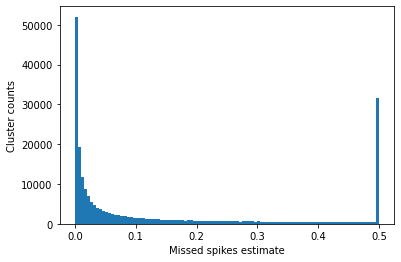

In [22]:
# plot histogram
import matplotlib.pyplot as plt
plt.hist(values, bins=100);
plt.xlabel('Missed spikes estimate');
plt.ylabel('Cluster counts');

## Filter ephys data based on behavioral performance

Now let's address a common question of how to fetch ephys data from sessions with good performance and recorded from a particular brain region

In [23]:
# get sessions with performance > 80% on easy trials
good_performance_clusters = ephys.DefaultCluster & (behavior_analyses.PsychResults & 'performance_easy > 0.8')
good_performance_clusters

subject_uuid,session_start_time start time,"probe_idx probe insertion number (0 corresponds to probe00, 1 corresponds to probe01)",cluster_id,cluster_uuid uuid of this cluster,cluster_channel which channel this cluster is from,cluster_amp Mean amplitude of each cluster (µV),"cluster_waveforms Waveform from spike sorting templates (stored as a sparse array, only for a subset of channels closest to the peak channel)",cluster_waveforms_channels Index of channels that are stored for each cluster waveform. Sorted by increasing distance from the maximum amplitude channel.,"cluster_depth Depth of mean cluster waveform on probe (µm). 0 means deepest site, positive means above this.",cluster_peak_to_trough trough to peak time (ms),cluster_spikes_times spike times of a particular cluster (seconds),"cluster_spikes_depths Depth along probe of each spike (µm; computed from waveform center of mass). 0 means deepest site, positive means above this",cluster_spikes_amps Amplitude of each spike (µV),cluster_spikes_templates Template ID of each spike (i.e. output of automatic spike sorting prior to manual curation),"cluster_spikes_samples Time of spikes, measured in units of samples in their own electrophysiology binary file.",cluster_ts
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,0,ddb47590-0da6-4353-bc7d-f7a53dba1db2,0,3.36357e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:28
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,1,e98101fe-734e-4b3c-b59d-450b499daf34,1,6.44137e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:29
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,2,08ea9c50-55aa-4c59-b247-804d1a8fba7f,1,3.07483e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:30
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,3,afd732e5-4fdf-472f-8726-dbae81a9f714,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:31
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,4,330cfd8f-0235-47d5-93c8-60fb0415c5ed,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:31
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,5,ec2fbf5c-0279-4979-adf6-8bcc62c21c1c,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:31
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,6,059018c4-a8bb-4f2b-8c5c-18ee10c6d22b,1,3.47621e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:32
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,7,d9baacaf-42ff-4bd1-a649-1ab65e1c03d1,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:32
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,8,3e129f19-25f5-4fc5-bb3e-46d73ad55023,1,2.73429e-05,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:32
05e97eea-64e2-4e52-a78a-5b78875b4fa3,2019-09-25 15:25:30,0,9,25cdeea3-3419-4791-9d0c-814ce30fcc94,1,nan,=BLOB=,=BLOB=,20.0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,2020-10-08 19:29:33


If we further need to filter with brain regions, we'll need to bring in several histology related tables.
The assignment of the brain region of each cluster is in the table `histology.ClusterBrainRegion`

In [24]:
histology.ClusterBrainRegion

ibl_pipeline.histology_shared.ClusterBrainRegion

Now let's figure out the acronym of the region of your interest, for example we would like to fetch from "visual cortex", we could do a vague search in the table `reference.BrainRegion` with the `like` keyword

In [25]:
visual_cortex = reference.BrainRegion() & 'brain_region_name like "%VIS%"'
visual_cortex

ontology,acronym,brain_region_name,brain_region_pk,brain_region_level,graph_order,parent
CCF 2017,AMBd,Nucleus ambiguus dorsal division,939,8,971,135
CCF 2017,AMBv,Nucleus ambiguus ventral division,143,8,972,135
CCF 2017,BSTa,Bed nuclei of the stria terminalis anterior division,359,8,622,351
CCF 2017,BSTal,Bed nuclei of the stria terminalis anterior division anterolateral area,537,9,623,359
CCF 2017,BSTam,Bed nuclei of the stria terminalis anterior division anteromedial area,498,9,624,359
CCF 2017,BSTd,Bed nuclei of the stria terminalis posterior division dorsal nucleus,569,9,633,367
CCF 2017,BSTdm,Bed nuclei of the stria terminalis anterior division dorsomedial nucleus,505,9,625,359
CCF 2017,BSTfu,Bed nuclei of the stria terminalis anterior division fusiform nucleus,513,9,626,359
CCF 2017,BSTif,Bed nuclei of the stria terminalis posterior division interfascicular nucleus,585,9,635,367
CCF 2017,BSTju,Bed nuclei of the stria terminalis anterior division juxtacapsular nucleus,546,9,627,359


Restrict the ClusterBrainRegion with these region entries and good performance clusters:

In [ ]:
histology.ClusterBrainRegion & visual_cortex & good_performance_clusters

## Compute firing rate during a time period aligned to behavior event

Now let's introduce another table `ephys.AlignedTrialSpikes` that might be helpful for your exploration.

In [ ]:
ephys.AlignedTrialSpikes.describe();

Spike times of each cluster where cut into different trials, aligned to one of the following events:

In [ ]:
dj.U('event') & ephys.AlignedTrialSpikes()

The table has many many entries, so we **do not** recommend loading the whole table. Some restrictions are necessary.

Now let's compute the firing rate of one cluster in a time window of 0-100ms relative to the stim on time of a trial:

In [35]:
# First, pick a session with cluster, for example, a session from mrsicflogellab
session = acquisition.Session & 'session_lab="mrsicflogellab"' & (subject.Subject & 'subject_nickname="SWC_043"') & \
'session_start_time="2020-09-21 19:02:17"'
session

subject_uuid,session_start_time start time,session_uuid,session_number number,session_end_time end time,session_lab name of lab,session_location name of the location,task_protocol,session_type type,session_narrative,session_ts
70bf8cbd-d312-4654-a4ea-3a21ea2f541b,2020-09-21 19:02:17,4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a,1,2020-09-21 19:47:36,mrsicflogellab,_iblrig_mrsicflogel_ephys_0,_iblrig_tasks_ephysChoiceWorld6.4.2,Experiment,None,2020-09-22 04:17:12


In [38]:
# pick a cluster from this session
clusters_session = ephys.DefaultCluster & session

In [40]:
# Then get the key of the first cluster listed above
cluster = clusters_session.fetch('KEY', limit=1)[0]
cluster

{'subject_uuid': UUID('70bf8cbd-d312-4654-a4ea-3a21ea2f541b'),
 'session_start_time': datetime.datetime(2020, 9, 21, 19, 2, 17),
 'probe_idx': 0,
 'cluster_id': 0}

In [41]:
# fetch all `trial_spike_times` aligned to stim on events, compute trial number
trials_spike_times = (ephys.AlignedTrialSpikes & cluster & 'event="stim on"').fetch('trial_spike_times')
n_trials = len(trials_spike_times)
n_trials

529

In [42]:
# stack spikes and only count the ones that are between 0 and 100. Remember that these spike times are pre-aligned
trials_spike_times_all = np.hstack(trials_spike_times)
spike_times_window = trials_spike_times_all[np.logical_and(trials_spike_times_all>0, trials_spike_times_all<0.1)]
spike_times_window

array([1.45429608e-02, 1.87429256e-02, 3.95094182e-02, 2.17741057e-02,
       4.56405723e-02, 2.29274573e-02, 3.61049050e-02, 3.77946996e-02,
       8.00089924e-02, 7.30886608e-02, 2.52796460e-02, 7.51620772e-02,
       8.82619672e-02, 8.63912708e-02, 7.37705917e-02, 1.06317481e-02,
       1.46650476e-02, 4.40314676e-02, 5.53672438e-02, 6.62004861e-02,
       1.08712174e-02, 2.04660471e-02, 6.16626524e-02, 9.76264376e-02,
       2.05512022e-02, 3.61844040e-02, 4.99176219e-02, 1.96430737e-02,
       9.01721587e-02, 1.10209262e-02, 3.77873673e-02, 8.89948915e-02,
       8.72793116e-02, 6.02156082e-03, 6.81893228e-03, 4.93767756e-04,
       3.97526164e-02, 5.56191493e-02, 7.30523356e-02, 1.71879831e-02,
       2.71878988e-02, 5.04860058e-02, 5.97440779e-02, 6.99194410e-02,
       9.44859004e-02, 9.94191922e-02, 6.80751948e-02, 8.93363831e-02,
       1.19829110e-02, 1.99015828e-03, 2.02900038e-02, 2.56566252e-02,
       2.98565897e-02, 4.59280070e-02, 5.54279268e-02, 6.76278238e-02,
      

In [43]:
# count the total spike numbers, divided by number of trials and the time window.
firing_rate = len(spike_times_window)/0.1/n_trials
firing_rate

9.489603024574668

# Plot Rasters for a given cluster aligned to a behavior event

Table `ephys.AlignedTrialSpikes` pre cut the spike times into different trials, aligned with some event. We will plot the rasters aligned to `stim on` event, using the above cluster as an example.

In [44]:
clusters_trials = ephys.AlignedTrialSpikes & cluster & 'event="stim on"'
clusters_trials

subject_uuid,session_start_time start time,"probe_idx probe insertion number (0 corresponds to probe00, 1 corresponds to probe01)",cluster_id,trial_id trial identification number,event,"trial_spike_times spike time for each trial, aligned to different event times",trial_spikes_ts
70bf8cbd-d312-4654-a4ea-3a21ea2f541b,2020-09-21 19:02:17,0,0,1,stim on,=BLOB=,2021-01-16 08:29:32
70bf8cbd-d312-4654-a4ea-3a21ea2f541b,2020-09-21 19:02:17,0,0,2,stim on,=BLOB=,2021-01-16 08:29:32
70bf8cbd-d312-4654-a4ea-3a21ea2f541b,2020-09-21 19:02:17,0,0,3,stim on,=BLOB=,2021-01-16 08:29:32
70bf8cbd-d312-4654-a4ea-3a21ea2f541b,2020-09-21 19:02:17,0,0,4,stim on,=BLOB=,2021-01-16 08:29:32
70bf8cbd-d312-4654-a4ea-3a21ea2f541b,2020-09-21 19:02:17,0,0,5,stim on,=BLOB=,2021-01-16 08:29:32
70bf8cbd-d312-4654-a4ea-3a21ea2f541b,2020-09-21 19:02:17,0,0,6,stim on,=BLOB=,2021-01-16 08:29:32
70bf8cbd-d312-4654-a4ea-3a21ea2f541b,2020-09-21 19:02:17,0,0,7,stim on,=BLOB=,2021-01-16 08:29:32
70bf8cbd-d312-4654-a4ea-3a21ea2f541b,2020-09-21 19:02:17,0,0,8,stim on,=BLOB=,2021-01-16 08:29:32
70bf8cbd-d312-4654-a4ea-3a21ea2f541b,2020-09-21 19:02:17,0,0,9,stim on,=BLOB=,2021-01-16 08:29:32
70bf8cbd-d312-4654-a4ea-3a21ea2f541b,2020-09-21 19:02:17,0,0,10,stim on,=BLOB=,2021-01-16 08:29:32


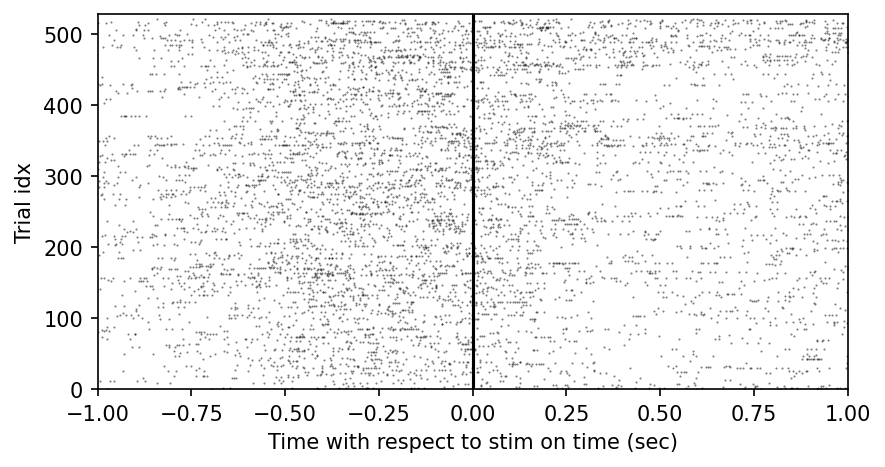

In [45]:
# fetch, sorted by trial_id
spk_times, trial_ids = clusters_trials.fetch(
    'trial_spike_times', 'trial_id', order_by='trial_id')
spk_trial_ids = np.hstack(
    [[trial_id] * len(spk_time)
     for trial_id, spk_time in enumerate(spk_times)])

fig = plt.figure(dpi=150, frameon=False, figsize=[5, 2.5])
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.plot(np.hstack(spk_times), spk_trial_ids, 'k.', markersize=2, alpha=0.5,
        markeredgewidth=0)
ax.plot([0, 0], [0, max(spk_trial_ids)], 'k')
x_lim = [-1, 1]
ax.set_xlim(x_lim)
ax.set_ylim([0, max(spk_trial_ids)])
ax.set_xlabel('Time with respect to stim on time (sec)')
ax.set_ylabel('Trial idx')
fig.add_axes(ax);

# Summary

In this notebook, we listed a few query examples related to ephys and histology schemas that might be helpful to explore the ephys and histology data. For a full-fledged introduction of major types of queries and fetches, please refer to [this notebook](01-Explore%20IBL%20data%20pipeline.ipynb).